In [215]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

In [264]:
import matplotlib.pyplot as plt
%matplotlib inline

In [265]:
np.random.seed(100)  # set the seed for generating the random nos

In [266]:
x = np.linspace(1,2*np.pi,20)
y = np.cos(x)*np.log(x)+ 0.3*np.random.randn(20) # add normal-dist noise


In [267]:
y.shape

(20,)

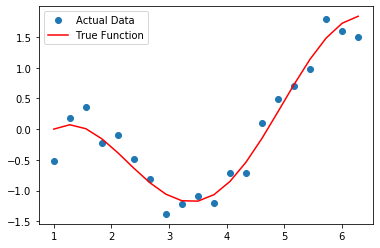

In [268]:
plt.plot(x,y,'o')
plt.plot(x,np.cos(x)*np.log(x),'r-')
plt.legend(['Actual Data', 'True Function'])

In [269]:
x = x.reshape(-1,1)
x.shape

(20, 1)

In [270]:
from sklearn.pipeline import Pipeline

In [271]:
pipelines = []
pipelines.append(('Poly1', Pipeline([('Linear-Feat', PolynomialFeatures(1)),('LR', LinearRegression())])))
pipelines.append(('Poly2', Pipeline([('Poly2-Feat', PolynomialFeatures(2)),('PR-2', LinearRegression())])))
pipelines.append(('Poly3', Pipeline([('Poly3-Feat', PolynomialFeatures(3)),('PR-3', LinearRegression())])))
pipelines.append(('Poly4', Pipeline([('Poly4-Feat', PolynomialFeatures(4)),('PR-4', LinearRegression())])))
pipelines.append(('Poly6', Pipeline([('Poly6-Feat', PolynomialFeatures(6)),('PR-6', LinearRegression())])))
pipelines.append(('Poly10', Pipeline([('Poly10-Feat', PolynomialFeatures(10)),('PR-10', LinearRegression())])))
pipelines.append(('Poly15', Pipeline([('Poly15-Feat', PolynomialFeatures(15)),('PR-15', LinearRegression())])))
pipelines.append(('Poly20', Pipeline([('Poly20-Feat', PolynomialFeatures(20)),('PR-20', LinearRegression())])))
pipelines

[('Poly1', Pipeline(memory=None,
           steps=[('Linear-Feat',
                   PolynomialFeatures(degree=1, include_bias=True,
                                      interaction_only=False, order='C')),
                  ('LR',
                   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                    normalize=False))],
           verbose=False)), ('Poly2', Pipeline(memory=None,
           steps=[('Poly2-Feat',
                   PolynomialFeatures(degree=2, include_bias=True,
                                      interaction_only=False, order='C')),
                  ('PR-2',
                   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                    normalize=False))],
           verbose=False)), ('Poly3', Pipeline(memory=None,
           steps=[('Poly3-Feat',
                   PolynomialFeatures(degree=3, include_bias=True,
                                      interaction_only=False, order=

In [272]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import pandas as pd

Poly1: -1.383855 (3.022802)
Poly2: -0.311743 (2.192417)
Poly3: -1.171216 (4.116924)
Poly4: 0.693208 (0.351137)
Poly6: 0.759271 (0.258447)
Poly10: -29.895721 (48.898178)
Poly15: -361.521500 (852.193355)
Poly20: -718.813749 (1646.265661)


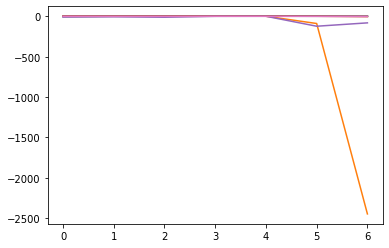

In [273]:
scoring = 'r2' #'neg_mean_squared_error'
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=7, shuffle=True, random_state=5)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

plt.plot(results[:-1])

In [274]:
len(results[1])

7

In [275]:
n_splits=7
pd.set_option('precision',3) # to set the 3-digits for display

In [276]:
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5 CV6 CV7'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df

,CV1,CV2,CV3,CV4,CV5,CV6,CV7,CV Mean,CV Std Dev
Poly1,-0.174,0.002,-2.327,0.483,-8.435,0.735,0.030,-1.384,3.265
Poly2,0.540,0.546,0.548,0.869,-5.645,0.903,0.056,-0.312,2.368
Poly3,0.527,0.180,0.547,0.868,-11.229,0.884,0.025,-1.171,4.447
Poly4,0.928,0.951,0.801,0.964,-0.078,0.813,0.474,0.693,0.379
Poly6,0.909,0.928,0.867,0.967,0.601,0.855,0.187,0.759,0.279
Poly10,0.579,-89.065,0.876,0.553,-122.716,0.590,-0.087,-29.896,52.816
Poly15,0.831,-2447.843,0.705,-3.153,-81.080,-0.319,0.209,-361.521,920.474
Poly20,0.434,-4744.294,0.839,-282.559,-3.492,-2.257,-0.368,-718.814,1778.170


In [277]:
results_df.sort_values(by='CV Mean', ascending=False)

,CV1,CV2,CV3,CV4,CV5,CV6,CV7,CV Mean,CV Std Dev
Poly6,0.909,0.928,0.867,0.967,0.601,0.855,0.187,0.759,0.279
Poly4,0.928,0.951,0.801,0.964,-0.078,0.813,0.474,0.693,0.379
Poly2,0.540,0.546,0.548,0.869,-5.645,0.903,0.056,-0.312,2.368
Poly3,0.527,0.180,0.547,0.868,-11.229,0.884,0.025,-1.171,4.447
Poly1,-0.174,0.002,-2.327,0.483,-8.435,0.735,0.030,-1.384,3.265
Poly10,0.579,-89.065,0.876,0.553,-122.716,0.590,-0.087,-29.896,52.816
Poly15,0.831,-2447.843,0.705,-3.153,-81.080,-0.319,0.209,-361.521,920.474
Poly20,0.434,-4744.294,0.839,-282.559,-3.492,-2.257,-0.368,-718.814,1778.170


In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, \
                                                    test_size=0.3, 
                                                    random_state=200)

In [279]:
scoring = 'neg_mean_squared_error'
results = []
names = []
for name, model in pipelines:
    model.fit(X_train,y_train)
    result = model.score(X_test,y_test)
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

Poly1: -0.187700
Poly2: 0.529794
Poly3: 0.236742
Poly4: 0.900760
Poly6: 0.629917
Poly10: -130.742368
Poly15: -1281.184193
Poly20: -1355.852132


In [280]:
LR = LinearRegression()
LR.fit(X_train,y_train)
LR.score(X_test,y_test)  # directly r^2 is obtained

-0.18769988548872574

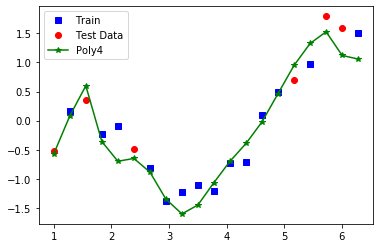

In [281]:
plt.plot(X_train,y_train,'bs')
plt.plot(X_test,y_test,'ro')
plt.plot(x,Poly_model.predict(X_poly),'g-*')
plt.legend(['Train','Test Data', 'Poly4'])

In [282]:
PR = PolynomialFeatures(4)
X_poly = PR.fit_transform(x)
Poly_model = LinearRegression()
Poly_model.fit(X_poly,y)
Poly_model.score(X_poly,y)

0.9672120669725115

In [283]:

for i in range(1,30):  # iterate up ploy29
    PR = PolynomialFeatures(i)
    X_poly = PR.fit_transform(x)
    Poly_model = LinearRegression(fit_intercept=True)
    Poly_model.fit(X_poly,y)
    print(i, Poly_model.score(X_poly,y))
    

1 0.34216765764070023
2 0.8115472551460757
3 0.8115617723635579
4 0.9672120669725115
5 0.9714185387877345
6 0.9722106719988964
7 0.9723247502390968
8 0.9736625626661793
9 0.9745914788492527
10 0.9746274222785807
11 0.976336745646532
12 0.9913756927215576
13 0.989590439991882
14 0.9877650661821685
15 0.9869540557512955
16 0.987374454880039
17 0.988022443435262
18 0.9873216326384117
19 0.9747658151885134
20 0.9724972925104612
21 0.9666489996885684
22 0.9652800597274364
23 0.9650165029082213
24 0.9599199081718108
25 0.9527068537464738
26 0.9431017853865736
27 0.9319993191425354
28 0.9202494634488008
29 0.8619690781517769


In [284]:
a = np.arange(0,10)
a = a*np.nan
a

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

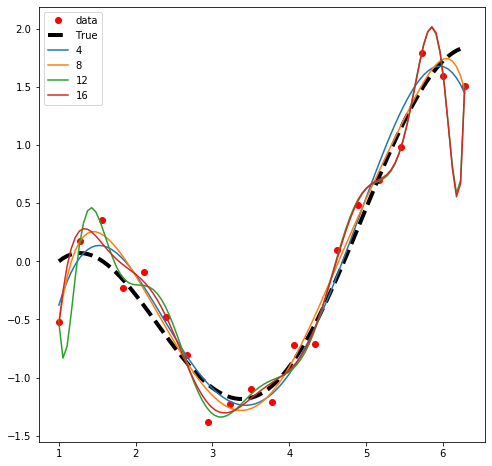

In [304]:
overall_acc = []
test_acc = []
colors = ['r','g','b','c','m']
plt.figure(figsize=(8,8))
plt.plot(x,y,'ro', label='data')

t = np.linspace(1,2*np.pi,100).reshape(-1,1)
plt.plot(t,np.cos(t)*np.log(t),'k--', lw=4, label='True')
model_coef = []
for i in range(1,20):
    PR = PolynomialFeatures(i)
    X_poly = PR.fit_transform(x)
    Poly_model = LinearRegression(fit_intercept=True)
    Poly_model.fit(X_poly,y)
    overall_acc.append(Poly_model.score(X_poly,y))
    
    x_train, x_test, y_train, y_test = train_test_split(X_poly,y, \
                                                    test_size=0.3, 
                                                    random_state=200)
    test_acc.append(Poly_model.score(x_test,y_test))
#     print(i, Poly_model.score(X_poly,y), Poly_model.score(x_test,y_test) )
    
#     print(i, Poly_model.coef_)
#     print('')
    model_coef.append(Poly_model.coef_)
    if i%4==0:  #plot only for poly3,6,9,12...
        plt.plot(t,Poly_model.predict(PR.fit_transform(t)), label=i) #, color=colors[i%5])

plt.legend()

In [305]:
model_coef[-1]

array([ 0.00000000e+00,  2.71434595e-02,  5.29582519e-02,  7.74439722e-02,
        8.84218297e-02,  7.39587719e-02,  2.90328488e-02, -3.03157452e-02,
       -6.08747791e-02, -2.29727640e-02,  4.64506455e-02,  2.76546964e-02,
       -5.78561123e-02,  3.57962721e-02, -1.23584615e-02,  2.69299845e-03,
       -3.80963564e-04,  3.41386347e-05, -1.76846604e-06,  4.04685447e-08])

In [286]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [287]:
lr.coef_

array([0.34727849])

In [288]:
lr.intercept_

-1.3051273059789497

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02089046755357815, tolerance: 0.001812270127505153
  positive)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6082407763635695, tolerance: 0.001812270127505153
  positive)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4359002053438554, tolerance: 0.001812270127505153
  positive)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

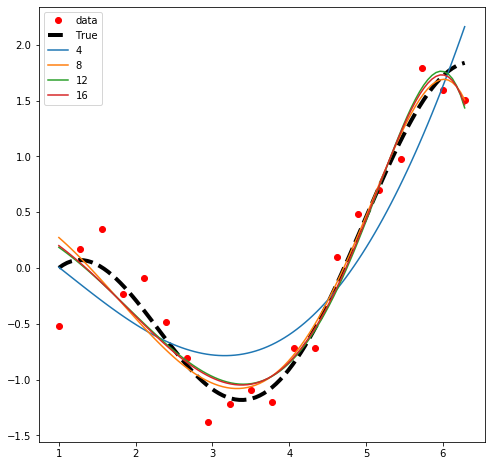

In [303]:
overall_acc = []
test_acc = []
colors = ['r','g','b','c','m', 'y']
plt.figure(figsize=(8,8))
plt.plot(x,y,'ro', label='data')

t = np.linspace(1,2*np.pi,100).reshape(-1,1)
plt.plot(t,np.cos(t)*np.log(t),'k--', lw=4, label='True')

model_coef = []

for i in range(1,20):
    PR = PolynomialFeatures(i)
    X_poly = PR.fit_transform(x)
    Poly_model = ElasticNet(l1_ratio=0.2, alpha=0.05, fit_intercept=True)
    Poly_model.fit(X_poly,y)
    overall_acc.append(Poly_model.score(X_poly,y))
    
    x_train, x_test, y_train, y_test = train_test_split(X_poly,y, \
                                                    test_size=0.3, 
                                                    random_state=200)
    test_acc.append(Poly_model.score(x_test,y_test))
#     print(i, Poly_model.score(X_poly,y), Poly_model.score(x_test,y_test) )
    
#     print(i, Poly_model.coef_)
#     print('')
    model_coef.append(Poly_model.coef_)
    
    if i%4==0:  #plot only for poly3,6,9,12...
        plt.plot(t,Poly_model.predict(PR.fit_transform(t)), label=i) #, color=colors[i%5])

plt.legend()

In [306]:
model_coef[-1]

array([ 0.00000000e+00,  2.71434595e-02,  5.29582519e-02,  7.74439722e-02,
        8.84218297e-02,  7.39587719e-02,  2.90328488e-02, -3.03157452e-02,
       -6.08747791e-02, -2.29727640e-02,  4.64506455e-02,  2.76546964e-02,
       -5.78561123e-02,  3.57962721e-02, -1.23584615e-02,  2.69299845e-03,
       -3.80963564e-04,  3.41386347e-05, -1.76846604e-06,  4.04685447e-08])

# Homework
Plot the model coefficents for a poly16 and compare the unregularised with regularised regression
Also compare the coeffients from diff types of regularisation